# Data Overview
- Original Data
    - Campaign Name: Name of the ad campaign.
    - Date: Date campaign was active and running.
    - Spend [USD]: Money spent on the campaign in US dollars.
    - \# of Impressions: Number of times an ad appears in front of a user's sight.
    - Reach: The total number of unique users who have seen the ad at least once.
    - \# of Website Clicks: The number of times users clicked on the ad and were directed to the website.
    - \# of Searches: The number of times users performed a search after interacting with the ad.
    - \# of View Content: The number of times users viewed a specific product or content page after clicking the ad.
    - \# of Add to Cart: The number of times users added an item to their cart after interacting with the ad.
    - \# of Purchase: The number of times users completed a purchase after clicking on the ad.
<br>
- Additional metrics to be added
  - Click-Through Rate (CTR): percentage of people who clicked the link on the ad.
    - CTR = $ \frac{clicks}{impressions} * 100 $
  - Conversion Rate (CR): percentage of people who clicked on an ad and made a purchase.
    - CR = $ \frac{purchases}{clicks} * 100 $
  - Cost per Impression (CPM): Amount of money spent per 1000 impressions.
    - CPM = $ \frac{spend}{impressions} * 1000$
  - Cost per Click (CPC): Amount of money spent per click.
    - CPC = $ \frac{spend}{clicks}$
  - Cost per Acquisition (CPA): Amount of money spent to get a customer to make a purchase.
    - CPA = $ \frac{spend}{purchases}$

# Load libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from math import ceil

# Load data

In [58]:
control = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\data analysis projects\\eda_dashboard_projects\\ab_test_marketing_data\\control_group.csv', delimiter = ';')
test = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\data analysis projects\\eda_dashboard_projects\\ab_test_marketing_data\\test_group.csv', delimiter = ';')

In [60]:
raw_control = control.copy()
raw_test = test.copy()

# Data preprocessing

In [63]:
raw_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [65]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


#### handling missing values
- Since there is only one row with missing values in the control group, we will drop it entirely from the dataset

In [68]:
raw_control.dropna(inplace = True)

In [70]:
raw_control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

#### merge datasets

In [73]:
campaign_df = pd.concat([raw_control, raw_test], ignore_index = True)

In [75]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        59 non-null     object 
 1   Date                 59 non-null     object 
 2   Spend [USD]          59 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ KB


#### change data type
- spend to float as its a currency
- campaign metrics to int as people cannot be fractions
- date column to yy/mm/dd format

In [80]:
campaign_df['Spend [USD]'] = campaign_df['Spend [USD]'].astype('float64')

In [82]:
campaign_df[campaign_df.iloc[:, 3:].columns] = campaign_df[campaign_df.iloc[:, 3:].columns].astype('int64')

In [84]:
# Convert to datetime format (specifying the day first)
campaign_df['Date'] = pd.to_datetime(campaign_df['Date'], format='%d.%m.%Y')

# Convert to desired format (YYYY/MM/DD)
campaign_df['Date'] = campaign_df['Date'].dt.strftime('%Y/%m/%d')

In [86]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        59 non-null     object 
 1   Date                 59 non-null     object 
 2   Spend [USD]          59 non-null     float64
 3   # of Impressions     59 non-null     int64  
 4   Reach                59 non-null     int64  
 5   # of Website Clicks  59 non-null     int64  
 6   # of Searches        59 non-null     int64  
 7   # of View Content    59 non-null     int64  
 8   # of Add to Cart     59 non-null     int64  
 9   # of Purchase        59 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.7+ KB


In [88]:
# campaign_df.head()

In [92]:
# campaign_df.to_csv('ad_marketing_data.csv', index = False)

#### create new features
- ctr, cr, cpm, cpc, cpa

In [95]:
campaign_df['CTR'] = round(campaign_df['# of Website Clicks']/campaign_df['# of Impressions'] * 100, 2)
campaign_df['CR'] = round(campaign_df['# of Purchase']/campaign_df['# of Website Clicks'] * 100, 2)
campaign_df['CPM'] = round(campaign_df['Spend [USD]']/campaign_df['# of Impressions'] * 1000, 2)
campaign_df['CPC'] = round(campaign_df['Spend [USD]']/campaign_df['# of Website Clicks'], 2)
campaign_df['CPA'] = round(campaign_df['Spend [USD]']/campaign_df['# of Purchase'], 2)

In [97]:
campaign_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CTR,CR,CPM,CPC,CPA
0,Control Campaign,2019/08/01,2280.0,82702,56930,7016,2290,2159,1819,618,8.48,8.81,27.57,0.32,3.69
1,Control Campaign,2019/08/02,1757.0,121040,102513,8110,2033,1841,1219,511,6.70,6.30,14.52,0.22,3.44
2,Control Campaign,2019/08/03,2343.0,131711,110862,6508,1737,1549,1134,372,4.94,5.72,17.79,0.36,6.30
3,Control Campaign,2019/08/04,1940.0,72878,61235,3065,1042,982,1183,340,4.21,11.09,26.62,0.63,5.71
4,Control Campaign,2019/08/06,3083.0,109076,87998,4028,1709,1249,784,764,3.69,18.97,28.26,0.77,4.04


In [99]:
#### drop unecessary columns
campaign_df.drop(['Reach', '# of Searches', '# of View Content', '# of Add to Cart'], axis=1, inplace=True)

In [101]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        59 non-null     object 
 1   Date                 59 non-null     object 
 2   Spend [USD]          59 non-null     float64
 3   # of Impressions     59 non-null     int64  
 4   # of Website Clicks  59 non-null     int64  
 5   # of Purchase        59 non-null     int64  
 6   CTR                  59 non-null     float64
 7   CR                   59 non-null     float64
 8   CPM                  59 non-null     float64
 9   CPC                  59 non-null     float64
 10  CPA                  59 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 5.2+ KB


# EDA

#### summary statistics

In [104]:
# show summary statistics 
campaign_df.describe()

,Spend [USD],# of Impressions,# of Website Clicks,# of Purchase,CTR,CR,CPM,CPC,CPA
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2435.762712,91775.881356,5682.593220,522.000000,7.712203,10.335085,32.376102,0.481356,5.483559
std,376.358795,32465.070636,1754.777559,196.973917,5.629255,5.810140,20.116686,0.198741,2.503822
min,1757.000000,22521.000000,2277.000000,222.000000,1.860000,3.010000,12.910000,0.220000,2.250000
25%,2113.500000,68853.500000,4227.500000,340.000000,4.280000,6.330000,20.315000,0.330000,3.495000
50%,2421.000000,95843.000000,5691.000000,501.000000,6.380000,8.810000,26.090000,0.430000,4.790000
75%,2743.000000,117315.000000,7218.500000,693.000000,8.450000,13.050000,34.100000,0.585000,7.520000
max,3112.000000,145248.000000,8264.000000,890.000000,33.820000,32.240000,116.600000,1.040000,12.700000


#### distribution plots plots

In [124]:
# Define number of rows and columns for subplots
num_vars = len(campaign_df.columns[2:])
cols = 3  # Number of columns
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows needed

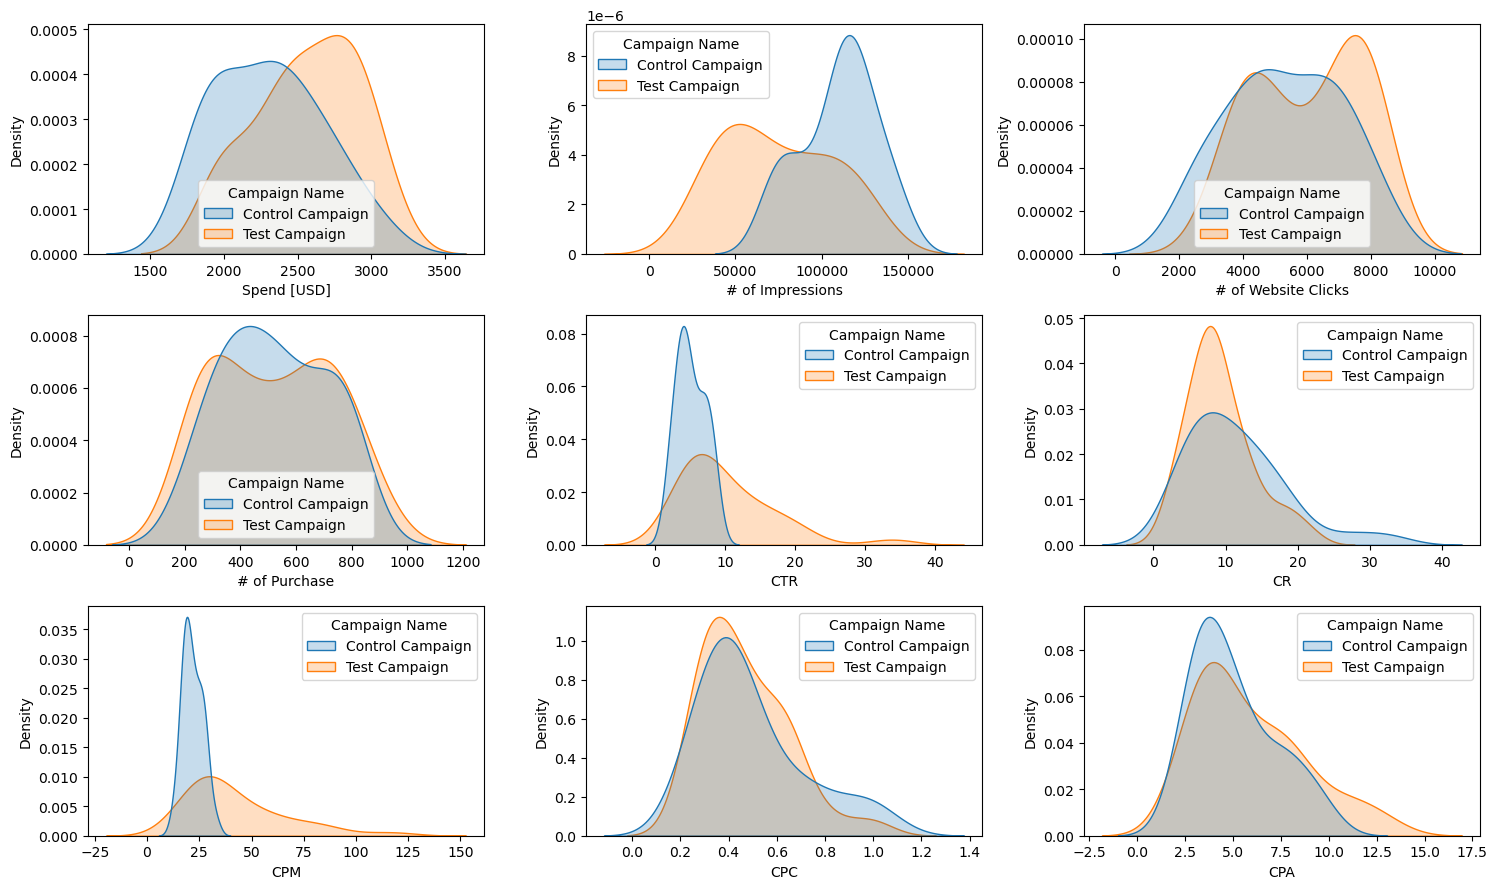

In [149]:
# Set an style for the plots
# sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate boxplots for each numerical variable grouped by default payment
for i, col in enumerate(campaign_df.columns[2:]):
    sns.kdeplot(data=campaign_df, x = campaign_df[col] , ax=axes[i], hue = 'Campaign Name', fill = True)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### outliers

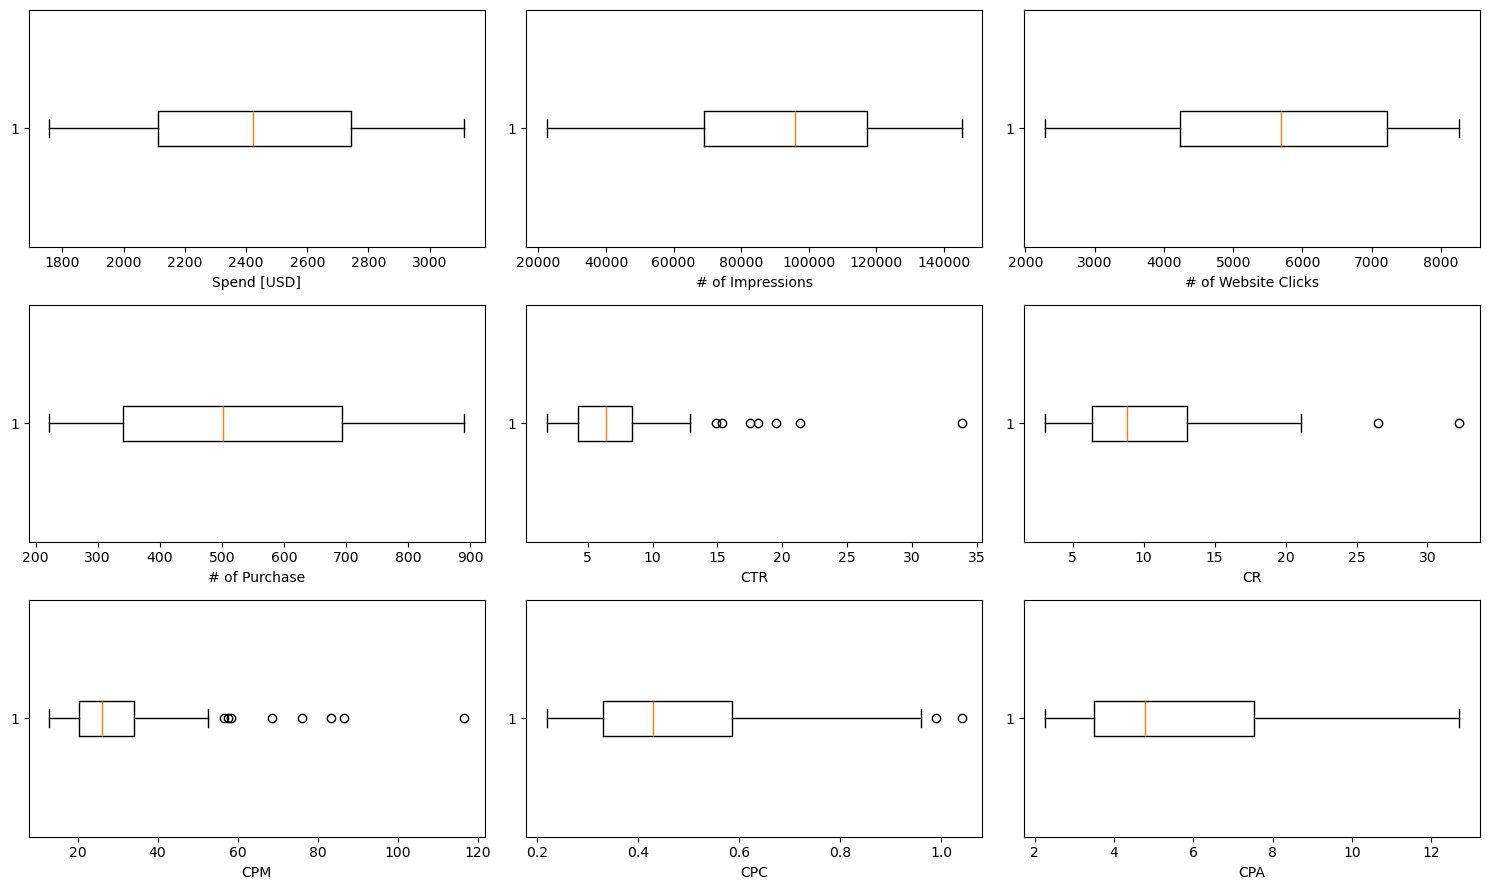

In [153]:
# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate boxplots for each numerical variable
for i, col in enumerate(campaign_df.columns[2:]):
    axes[i].boxplot(campaign_df[col], vert=False)  # Horizontal boxplot for readability
    axes[i].set_xlabel(col)

# Remove any empty subplots (in case rows * cols is larger than needed)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Comments**
- Higher Spend & Clicks in Test Campaign: The Test Campaign generally has higher spend and website clicks, suggesting a more aggressive strategy to drive engagement.
- Better CTR & CR in Test Campaign: The Test Campaign has a broader CTR and CR distribution, indicating it may be more effective at converting impressions into clicks and purchases.
- Higher Variability in Test Campaign: Metrics like CPM and CPA show greater spread in the Test Campaign, suggesting it may be more inconsistent in cost-efficiency.
- Control Campaign More Cost-Efficient: The Control Campaign appears to have lower CPC and CPA density peaks, implying it might be generating conversions at a lower cost. 

# Hypothesis Testing
- We will be using a one tailed test as we are strictly want to know if average bidding is a better strategy than our current strategy of maximum bidding.
- Primary Hypothesis (Rate Improvement)
  - Null Hypothesis (H₀): There is no difference in rates between Average Bidding and Maximum Bidding.
  - Alternative Hypothesis (H₁): Average Bidding leads to a higher conversion rate than Maximum Bidding.
- Secondary Hypothesis (Cost Efficiency)
  - Null Hypothesis (H₀): There is no difference in costs between Average Bidding and Maximum Bidding.
  - Alternative Hypothesis (H₁): Average Bidding results in a lower cost per conversion (CPA) than Maximum Bidding.
- We will use a confidence level of 95% (0.05)

#### Test data for normality
- We will use the shapiro-wilk test.
  - Null Hypothesis (H₀): data has a normal distribution.
  - Alternative Hypothesis (H₁): data does not have a normal distribution.
- We will use a confidence level of 95% (0.05)

In [231]:
metrics = ['CTR', 'CR', 'CPM', 'CPC', 'CPA']

for m in metrics:
    
    # Use shapiro() function from scipy for the m metric
    result = stats.shapiro(campaign_df[campaign_df['Campaign Name'] == 'Control Campaign'][m])
    statistic = round(result[0], 4)
    p_value = round(result[1], 4)
    
    # Show the result
    print(f'{m} Shapiro-Wilk Test:\n')
    print(f'\t- Statistic: {statistic}')
    print(f'\t- P-value: {p_value}\n\n')

CTR Shapiro-Wilk Test:

	- Statistic: 0.9549
	- P-value: 0.2443


CR Shapiro-Wilk Test:

	- Statistic: 0.8945
	- P-value: 0.0073


CPM Shapiro-Wilk Test:

	- Statistic: 0.9677
	- P-value: 0.5003


CPC Shapiro-Wilk Test:

	- Statistic: 0.8755
	- P-value: 0.0027


CPA Shapiro-Wilk Test:

	- Statistic: 0.9133
	- P-value: 0.0207




In [233]:
for m in metrics:
    
    # Use shapiro() function from scipy for the m metric
    result = stats.shapiro(campaign_df[campaign_df['Campaign Name'] == 'Test Campaign'][m])
    statistic = round(result[0], 4)
    p_value = round(result[1], 4)
    
    # Show the result
    print(f'{m} Shapiro-Wilk Test:\n')
    print(f'\t- Statistic: {statistic}')
    print(f'\t- P-value: {p_value}\n\n')

CTR Shapiro-Wilk Test:

	- Statistic: 0.841
	- P-value: 0.0004


CR Shapiro-Wilk Test:

	- Statistic: 0.9255
	- P-value: 0.0373


CPM Shapiro-Wilk Test:

	- Statistic: 0.8486
	- P-value: 0.0006


CPC Shapiro-Wilk Test:

	- Statistic: 0.9087
	- P-value: 0.0138


CPA Shapiro-Wilk Test:

	- Statistic: 0.8965
	- P-value: 0.0069




**Comments**
- Across all metrics, the p-value is less than our significance level of 0.05. Therefore we reject the null hypothesis of normality and will use the Mann-Whitney test for our a/b test.

## Mann-Whitney Test

In [225]:
# Perform Mann-Whitney U Test for each metric
mann_whitney_results = {}

for m in metrics:
    
    control_values = campaign_df[campaign_df['Campaign Name'] == 'Control Campaign'][m]
    test_values = campaign_df[campaign_df['Campaign Name'] == 'Test Campaign'][m]

    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(test_values, control_values, alternative='greater')
    mann_whitney_results[m] = {"Statistic": stat, "P-value": round(p_value, 4)}

# Display results
mann_whitney_df = pd.DataFrame.from_dict(mann_whitney_results, orient='index')

In [227]:
mann_whitney_df

,Statistic,P-value
CTR,677.0,0.0001
CR,366.5,0.8523
CPM,756.0,0.0000
CPC,422.5,0.5782
CPA,507.5,0.1375


**Comments**
- CTR (Click-Through Rate) is significantly higher in the Test campaign (p = 0.000125), meaning the new average bidding strategy drives more clicks than the maximum bidding strategy.
- CPM (Cost Per Thousand Impressions) is also significantly higher (p = 0.0000006), which means the new bidding strategy is costing more per impression.
- CR (Conversion Rate), CPC (Cost Per Click), and CPA (Cost Per Acquisition) are not significantly different, meaning the new bidding strategy does not improve conversions or cost efficiency.